# 1. Imports, Cleaning and EDA

## 1.1. Imports

In [8]:
from pySimFinLIB import pySimFin
import pandas as pd
import seaborn as sns
from simfin.names import *
import matplotlib.pyplot as plt
import requests
from dotenv import load_dotenv
import os
import pandas as pd

import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LinearSegmentedColormap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.2 Data Cleaning

In [9]:
ticker = 'AAPL'
startDate = '2022-01-01'
endDate = '2023-01-01'

In [10]:
psf = pySimFin()

In [11]:
infoDF = psf.getCompanyInfo(ticker)
companyDF = psf.getCompanyList()
pricesDF = psf.getStockPrices(ticker,startDate,endDate)

In [12]:
companyDF

,id,name,ticker,sectorCode,industryName,sectorName,isin
0,1234791,STERLING BANCORP,STL,104002.0,Financial Services,Banks,US85917A1007
3,1253409,Infosys Ltd,INFY,101003.0,Technology,Application Software,US4567881085
4,1291790,ACCELERON PHARMA INC,XLRN,106001.0,Healthcare,Medical Diagnostics & Research,US00434H1086
42,65359,ALEXION PHARMACEUTICALS INC,ALXN,106002.0,Healthcare,Biotechnology,US0153511094
48,76840,"REMEDENT, INC.",REMI,106003.0,Healthcare,Medical Instruments & Equipment,US75954T1043
...,...,...,...,...,...,...,...
6264,18599360,Seanergy Maritime Holdings Corp.,SHIP,100010.0,Industrials,Transportation & Logistics,MHY737601945
6265,18599362,Wix.com Ltd.,WIX,101003.0,Technology,Application Software,IL0011301780
6266,18599364,Sprott Physical Platinum and Palladium Trust,SPPP,104001.0,Financial Services,Asset Management,CA85207Q1046
6267,18599366,Sportradar Group AG,SRAD,101003.0,Technology,Application Software,CH1134239669


In [13]:
stock_data = psf.getStockPrices(ticker, startDate, endDate)
stock_data 

,Common Shares Outstanding,Last Closing Price,Adjusted Closing Price,Highest Price,Lowest Price,Opening Price,Trading Volume
Date,,,,,,,
2022-01-03,16687631000,182.01,178.89,182.88,177.71,177.83,104701220
2022-01-04,16687631000,179.70,176.61,182.94,179.12,182.63,99310438
2022-01-05,16687631000,174.92,171.92,180.17,174.64,179.61,94537602
2022-01-06,16687631000,172.00,169.05,175.30,171.64,172.70,96903955
2022-01-07,16687631000,172.17,169.21,174.14,171.03,172.89,86709147
...,...,...,...,...,...,...,...
2022-12-23,16030382000,131.86,130.35,132.41,129.64,130.92,63814893
2022-12-27,16030382000,130.03,128.54,131.41,128.72,131.38,69007830
2022-12-28,16030382000,126.04,124.60,131.03,125.87,129.67,85438391


In [14]:
def selectMultipleStocks(selected_stocks, startDate, endDate):
    selected_stock_data = {}

    for ticker in selected_stocks:
        # Get stock data for each ticker
        stock_data = psf.getStockPrices(ticker, startDate, endDate)
        stock_data = stock_data['Last Closing Price']
        
        
        # Store stock data in the dictionary with the ticker as the key
        selected_stock_data[ticker] = stock_data

    return pd.DataFrame(selected_stock_data)

In [15]:


selected_stocks = ['AAPL','AMZN','NFLX','GOOG']

psf.selectMultipleStocks(selected_stocks, startDate, endDate)

,AAPL,AMZN,NFLX,GOOG
Date,,,,
2022-01-03,182.01,170.40,597.37,145.07
2022-01-04,179.70,167.52,591.15,144.42
2022-01-05,174.92,164.36,567.52,137.65
2022-01-06,172.00,163.25,553.29,137.55
2022-01-07,172.17,162.55,541.06,137.00
...,...,...,...,...
2022-12-23,131.86,85.25,294.96,89.81
2022-12-27,130.03,83.04,284.17,87.93
2022-12-28,126.04,81.82,276.88,86.46


In [16]:
def tickerFind(nameList,companyDF):
    tickerList = []
    for name in nameList:
        for index, company in companyDF.iterrows():
            if name == company['name']:
                tickerList.append(company['ticker'])
    return tickerList

names = list(companyDF['name'].sample(5))

tickerFind(names,companyDF)

['IESC', 'ABM', 'HWM', 'NWBO', 'NBIX']

# TS Modelling

In [17]:
psf = pySimFin()

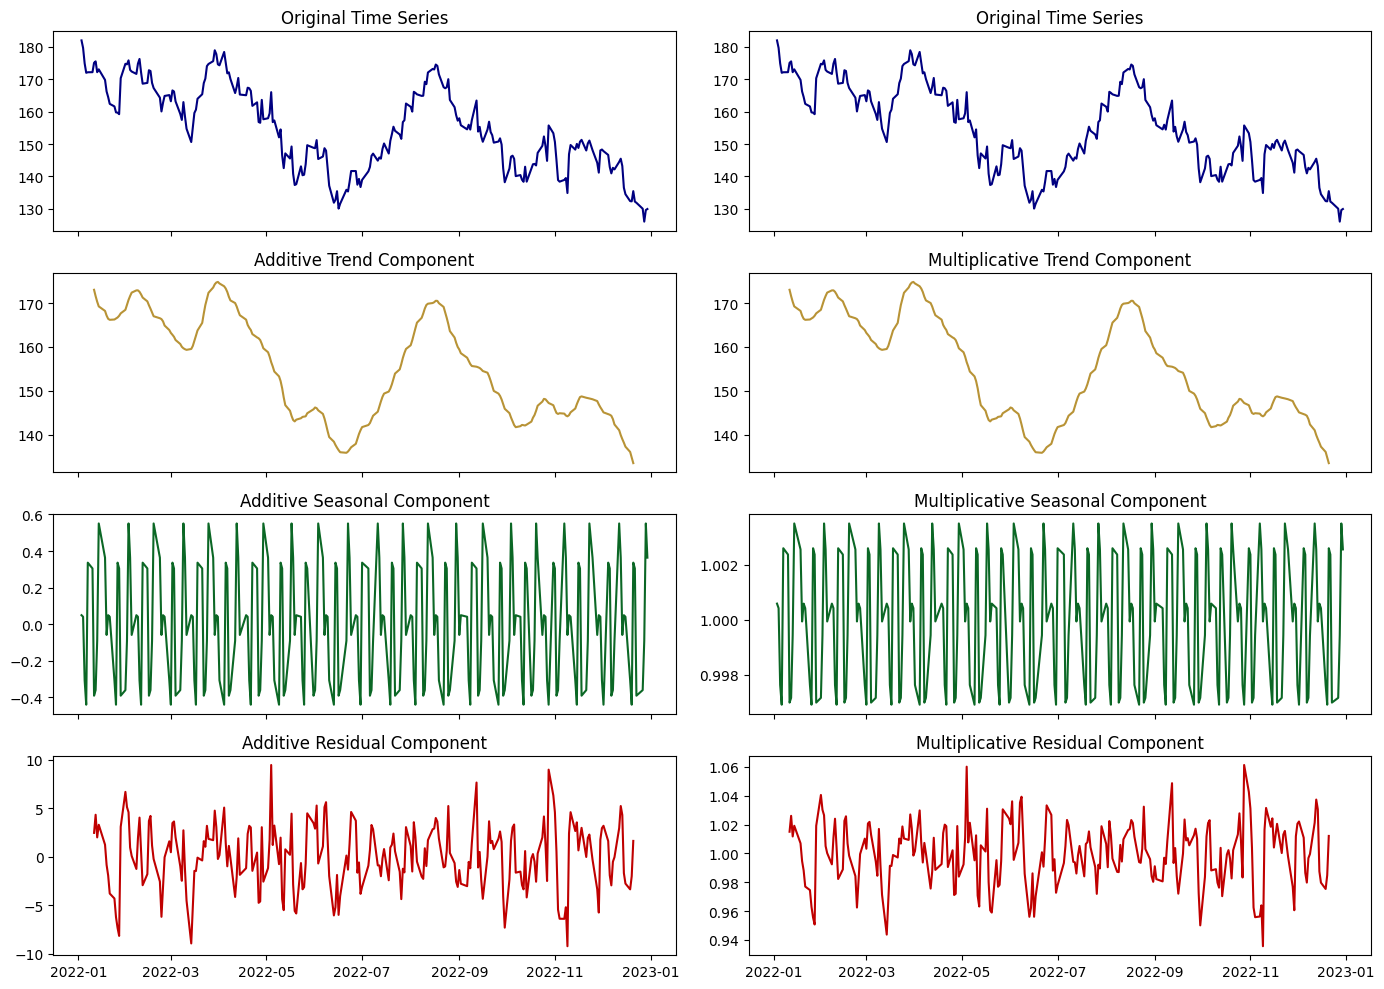

In [18]:
stockPrice = psf.selectSingleStock('AAPL', startDate, endDate)

additive_decomposition = seasonal_decompose(stockPrice, model="additive", period=12)
multiplicative_decomposition = seasonal_decompose(stockPrice, model="multiplicative", period=12)

# Plot both decompositions side by side
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

navy = "#000080"
gold = "#B89336"
green = "#0B6725"
red = "#C00000"

# Additive Decomposition Plots
axes[0, 0].plot(stockPrice.index, stockPrice, color="#000080")
axes[0, 0].set_title("Original Time Series")

axes[1, 0].plot(stockPrice.index, additive_decomposition.trend, color="#B89336")
axes[1, 0].set_title("Additive Trend Component")

axes[2, 0].plot(stockPrice.index, additive_decomposition.seasonal, color="#0B6725")
axes[2, 0].set_title("Additive Seasonal Component")

axes[3, 0].plot(stockPrice.index, additive_decomposition.resid, color="#C00000")
axes[3, 0].set_title("Additive Residual Component")

# Multiplicative Decomposition Plots
axes[0, 1].plot(stockPrice.index, stockPrice, color="#000080")
axes[0, 1].set_title("Original Time Series")

axes[1, 1].plot(stockPrice.index, multiplicative_decomposition.trend, color="#B89336")
axes[1, 1].set_title("Multiplicative Trend Component")

axes[2, 1].plot(stockPrice.index, multiplicative_decomposition.seasonal, color="#0B6725")
axes[2, 1].set_title("Multiplicative Seasonal Component")

axes[3, 1].plot(stockPrice.index, multiplicative_decomposition.resid, color="#C00000")
axes[3, 1].set_title("Multiplicative Residual Component")

plt.tight_layout()
plt.show()

In [19]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

def compare_decompositions(ts, model_type='multiplicative'):
    ts = ts.dropna()
    if model_type == 'multiplicative':
        decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative', period=12)
    else:
        decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=12)

    # Get the decomposed components
    trend = decomposition.trend.dropna()
    seasonal = decomposition.seasonal.dropna()
    residual = decomposition.resid.dropna()

    # Calculate errors between original and fitted series
    fitted_values = trend + seasonal + residual if model_type == 'additive' else trend * seasonal * residual

    # Evaluate performance using MAE and RMSE
    mae = mean_absolute_error(ts, fitted_values)
    rmse = root_mean_squared_error(ts, fitted_values, squared=False)

    return mae, rmse

In [20]:
stockPrice = psf.selectSingleStock('AAPL', startDate, endDate)

decomposition = sm.tsa.seasonal_decompose(stockPrice, model='multiplicative', period=7)

# Check if any of the components have NaN values
print("Trend NaNs:", decomposition.trend.isna().sum())
print("Seasonal NaNs:", decomposition.seasonal.isna().sum())
print("Residual NaNs:", decomposition.resid.isna().sum())

Trend NaNs: 6
Seasonal NaNs: 0
Residual NaNs: 6


In [21]:
df = pricesDF.copy()
df = df.reset_index()

In [22]:
df.head()

,Date,Common Shares Outstanding,Last Closing Price,Adjusted Closing Price,Highest Price,Lowest Price,Opening Price,Trading Volume
0,2022-01-03,16687631000,182.01,178.89,182.88,177.71,177.83,104701220
1,2022-01-04,16687631000,179.70,176.61,182.94,179.12,182.63,99310438
2,2022-01-05,16687631000,174.92,171.92,180.17,174.64,179.61,94537602
3,2022-01-06,16687631000,172.00,169.05,175.30,171.64,172.70,96903955
4,2022-01-07,16687631000,172.17,169.21,174.14,171.03,172.89,86709147


In [23]:


# Rename for clarity (optional)
df.rename(columns={
    'Last Closing Price': 'Close',
    'Opening Price': 'Open',
    'Highest Price': 'High',
    'Lowest Price': 'Low',
    'Trading Volume': 'Volume'
}, inplace=True)

# Create next day's closing price as target
df['Next_Close'] = df['Close'].shift(-1)

# Drop rows with missing values (last row will be NaN after shift)
df = df.dropna()

# Convert Date column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Define features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Close']


In [24]:

from sklearn.model_selection import train_test_split

# Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # Keep time order
)


In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 2.8261
Mean Squared Error (MSE): 13.6085
R² Score: 0.7457


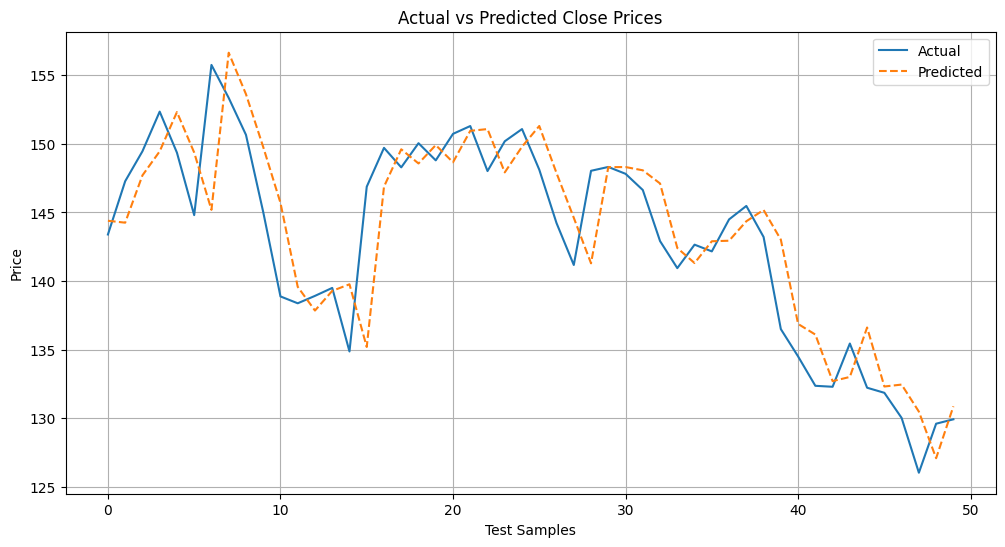

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

# Display results
import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='MAE')  # Lower MAE is better
results_df


,MAE,MSE,R²
Linear Regression,2.826121,13.608533,0.745702
Random Forest,3.752782,19.852331,0.629026
XGBoost,4.326179,25.850331,0.516943


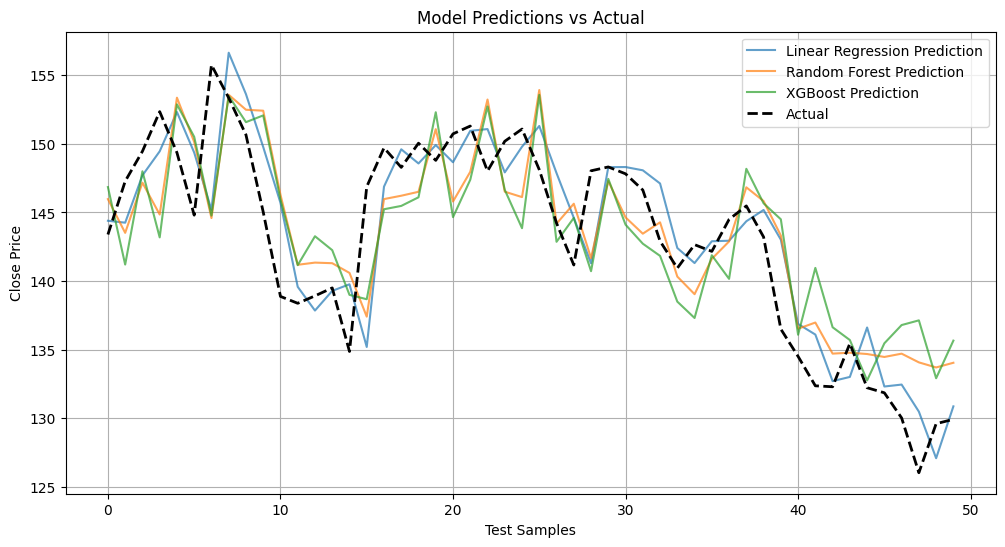

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(y_pred, label=f'{name} Prediction', alpha=0.7)

plt.plot(y_test.values, label='Actual', linewidth=2, linestyle='--', color='black')
plt.title('Model Predictions vs Actual')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import requests

url = "https://backend.simfin.com/api/v3/companies/statements/compact?ticker=AAPL&statements=PL&period=&start=2022-01-01&end=2023-01-01"

headers = {
    "accept": "application/json",
    "Authorization": "70d5d920-9f9e-4062-9311-1b4df7c98ba4"
}

response = requests.get(url, headers=headers)

print(response.text)

[{"template":"GENERAL","name":"APPLE INC","id":111052,"ticker":"AAPL","currency":"USD","isin":"US0378331005","statements":[{"statement":"PL","columns":["Fiscal Period","Fiscal Year","Report Date","Publish Date","Restated","Source","TTM","Value Check","Data Model","Revenue","Sales & Services Revenue","Financing Revenue","Other Revenue","Cost of revenue","Cost of Goods & Services","Cost of Financing Revenue","Cost of Other Revenue","Gross Profit","Other Operating Income","Operating Expenses","Selling, General & Administrative","Selling & Marketing","General & Administrative","Research & Development","Depreciation & Amortization","Provision For Doubtful Accounts","Other Operating Expense","Operating Income (Loss)","Non-Operating Income (Loss)","Interest Expense, net","Interest Expense","Interest Income","Other Investment Income (Loss)","Foreign Exchange Gain (Loss)","Income (Loss) from Affiliates","Other Non-Operating Income (Loss)","Pretax Income (Loss), Adjusted","Abnormal Gains (Losses

In [32]:
def statements(ticker,type,startDate,endDate):
    url = f"https://backend.simfin.com/api/v3/companies/statements/compact?ticker={ticker}&statements={type}&period=&start={startDate}&end={endDate}"

    headers = {
        "accept": "application/json",
        "Authorization": "70d5d920-9f9e-4062-9311-1b4df7c98ba4"
    }

    response = requests.get(url, headers=headers)

    print(response.text)

statements('AAPL','PL','2022-01-01','2023-01-01')

[{"template":"GENERAL","name":"APPLE INC","id":111052,"ticker":"AAPL","currency":"USD","isin":"US0378331005","statements":[{"statement":"PL","columns":["Fiscal Period","Fiscal Year","Report Date","Publish Date","Restated","Source","TTM","Value Check","Data Model","Revenue","Sales & Services Revenue","Financing Revenue","Other Revenue","Cost of revenue","Cost of Goods & Services","Cost of Financing Revenue","Cost of Other Revenue","Gross Profit","Other Operating Income","Operating Expenses","Selling, General & Administrative","Selling & Marketing","General & Administrative","Research & Development","Depreciation & Amortization","Provision For Doubtful Accounts","Other Operating Expense","Operating Income (Loss)","Non-Operating Income (Loss)","Interest Expense, net","Interest Expense","Interest Income","Other Investment Income (Loss)","Foreign Exchange Gain (Loss)","Income (Loss) from Affiliates","Other Non-Operating Income (Loss)","Pretax Income (Loss), Adjusted","Abnormal Gains (Losses

In [33]:
psf = pySimFin()
psf.getStatementsData('AAPL','PL','2022-01-01','2023-01-01')

[{"template":"GENERAL","name":"APPLE INC","id":111052,"ticker":"AAPL","currency":"USD","isin":"US0378331005","statements":[{"statement":"PL","columns":["Fiscal Period","Fiscal Year","Report Date","Publish Date","Restated","Source","TTM","Value Check","Data Model","Revenue","Sales & Services Revenue","Financing Revenue","Other Revenue","Cost of revenue","Cost of Goods & Services","Cost of Financing Revenue","Cost of Other Revenue","Gross Profit","Other Operating Income","Operating Expenses","Selling, General & Administrative","Selling & Marketing","General & Administrative","Research & Development","Depreciation & Amortization","Provision For Doubtful Accounts","Other Operating Expense","Operating Income (Loss)","Non-Operating Income (Loss)","Interest Expense, net","Interest Expense","Interest Income","Other Investment Income (Loss)","Foreign Exchange Gain (Loss)","Income (Loss) from Affiliates","Other Non-Operating Income (Loss)","Pretax Income (Loss), Adjusted","Abnormal Gains (Losses

In [34]:
from pySimFinLIB import pySimFin
psf = pySimFin()
df = psf.statements('AAPL','DERIVED','2018-01-01','2026-01-01')

In [35]:
tickerList = list(psf.getCompanyList()['ticker'])

masterDF = pd.DataFrame()
for ticker in tickerList:
    df = psf.statements(ticker, 'DERIVED', '2019-01-01', '2020-01-01')

    masterDF = pd.concat([masterDF, df], ignore_index=True)


IndexError: list index out of range

In [16]:
df[df['Fiscal Period']=='FY']

,Fiscal Period,Fiscal Year,Report Date,TTM,Restated,Data Model,Gross Profit Margin,Operating Margin,EBITDA,"Earnings Per Share, Basic",...,Net Income (Adjusted),Net Profit Margin (Adjusted),Return on Equity (Adjusted),Return on Assets (Adjusted),Free Cash Flow to Net Income (Adjusted),Return On Invested Capital (Adjusted),Debt Ratio,Total Debt,Return on Equity,Return on Assets
0,FY,2022,2022-09-30,0,1,0.0,0.4331,0.30289,130541000000,6.15461,...,99803000000,0.2531,1.96959,0.28292,1.4061,0.53702,0.37574,132544717616,1.75407,0.28292


In [6]:
import importlib
import pySimFinLIB
importlib.reload(pySimFinLIB)

<module 'pySimFinLIB' from '/Users/samjones/Library/CloudStorage/GoogleDrive-sam.jones@student.ie.edu/Shared drives/MBD S2 - Group 4 /02 Python II/SimFin-G4/pySimFinLIB.py'>

In [36]:
psf = pySimFin()

pricesDF = psf.getStockPrices(ticker,startDate,'2025-03-24')

import LinReg2

mse, r2, rmse, percentage_rmse, y_pred = LinReg2.linreg2(pricesDF)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Value: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Percentage RMSE: {percentage_rmse}%")
print(f"Next Day Price Predictions: {y_pred}")

Mean Squared Error: 0.12415735869481863
Model Coefficients: [ 4.65939546e-10  8.84335829e-01  6.26631578e-02  1.41175514e-01
  2.37465516e-01 -3.38417746e-01 -2.65304628e-09]
Intercept: -1.6185583440489708


Mean Absolute Error (MAE): 2.8261
Mean Squared Error (MSE): 13.6085
R² Score: 0.7457


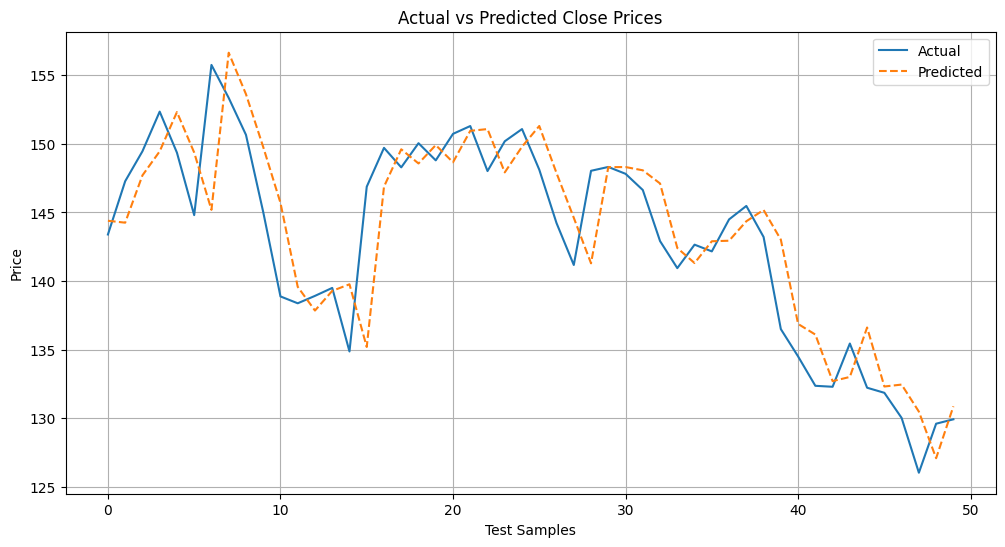

In [32]:
from pySimFinLIB import pySimFin
psf = pySimFin()

model, mae, mse, r2 = psf.train_linear_model(pricesDF)

In [34]:
def run_one_step_forecast_new_df(df_new):
    df_new.rename(columns={
        'Last Closing Price': 'Close',
        'Opening Price': 'Open',
        'Highest Price': 'High',
        'Lowest Price': 'Low',
        'Trading Volume': 'Volume'
    }, inplace=True)
    
    # Drop the last row, which now has a missing target value
    df_new = df_new.dropna()

    # 2. Create next day's closing price as target
    df['Next_Close'] = df['Close'].shift(-1)
    
    # Define the feature columns and target column
    feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    target_col = 'Next_Close'
    
    # Use all rows except the last one for training
    train_df = df_new.iloc[:-1]
    X_train = train_df[feature_cols]
    y_train = train_df[target_col]
    
    # Use the last row as the input for prediction
    latest_data = df_new.iloc[[-1]][feature_cols]
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the next day's closing price using the latest data
    next_day_prediction = model.predict(latest_data)[0]
    
    # Add the prediction to the new DataFrame (in the last row)
    df_new.loc[df_new.index[-1], 'Predicted_Next_Close'] = next_day_prediction
    
    return df_new, model

In [2]:
from pySimFinLIB import pySimFin
psf = pySimFin()

ticker = 'AAPL'
startDate = '2022-01-01'
endDate = '2023-01-01'

pricesDF = psf.getStockPrices(ticker,startDate,endDate)

psf.train_linear_model2(pricesDF)

KeyError: 'Next_Close'